# Heart Disease Prediction Using Logistic Regression

# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 

# Reading the Data
Read in the Heart_Disease_Prediction.csv file and set it to a data frame called df and checking the head of df.

In [7]:
df=pd.read_csv("Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


**Using info and describe on df

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [9]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


# Checking whether missing values are present are not

In [10]:
missing_values=df.isnull().sum()
missing_values


Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

# Data cleaning and preprocessng here
# Data preprocessing for changing categorical value into binary format
here used OrdinalEncoder method for sklearn preprocessing library

In [11]:
## Here, First change the heart disease feature into binary format like 0 is the absense of heart disease otherwise have heart disease
import category_encoders as ce
ecoder = ce.OrdinalEncoder(cols = ['Heart Disease'] , return_df = True , mapping = [{'col':'Heart Disease','mapping':{'Presence':1 , 'Absence': 0}}])
df['Heart Disease']= ecoder.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


# Data Visualization

## Correlation Matrix

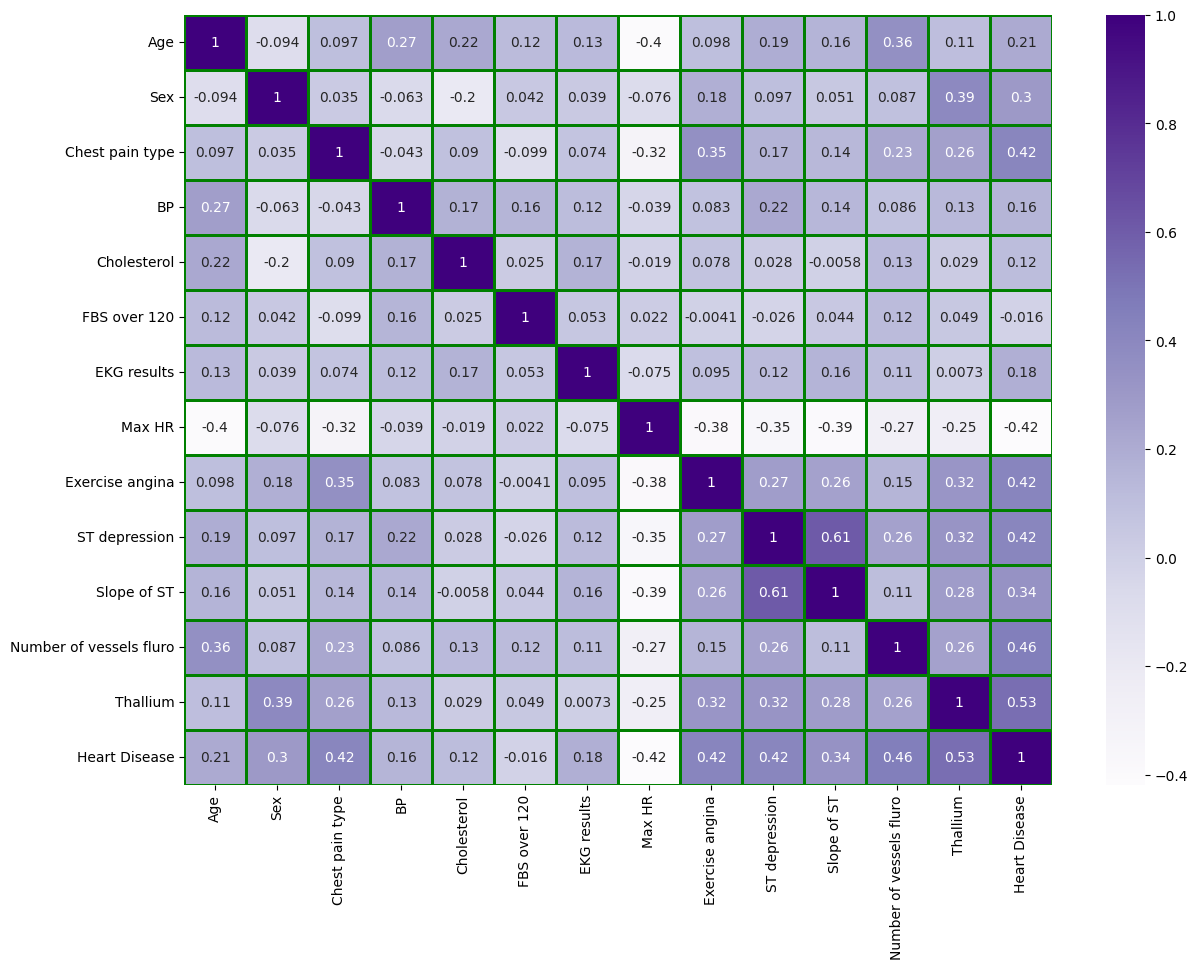

In [12]:
plt.figure(figsize = (14, 10)) 
sb.heatmap(df.corr(), cmap='Purples',annot=True, linecolor='Green', linewidths=1.0)
plt.show()

## Countplot of people based on their sex and whether they are attacked by Heart Disease or not

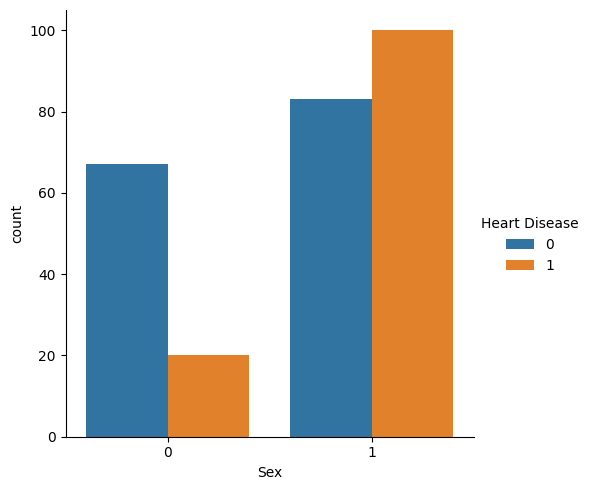

In [13]:
sb.catplot(data=df, kind='count', x='Sex',hue='Heart Disease')
plt.show()

# Splitting the data into training and test sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[['Age','Chest pain type','Cholesterol','Max HR','Exercise angina','ST depression',
        'Number of vessels fluro', 'Thallium']]
y= df['Heart Disease']

**splitting the data into 80:20 ratio

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# importing LogisticRegression 

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model= LogisticRegression()

In [20]:
model.fit(X_train,y_train)

c:\Users\notla\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicted values for Heart_Disease.

In [21]:
pred=model.predict(X_test)
pred

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

# Accuracy of model

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
accuracy=accuracy_score(y_test,pred)
print("Accuracy",accuracy)

Accuracy 0.9259259259259259


# Confusion matries and Confusion Matrix Display through graph

In [24]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [25]:
confusion=confusion_matrix(y_test,pred)
print("Confusion_Matix",confusion)

Confusion_Matix [[33  0]
 [ 4 17]]


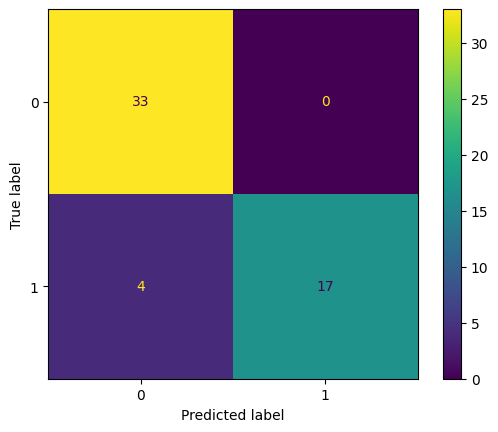

In [26]:
cm = confusion_matrix(y_test, pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

# Classification report

In [27]:
from sklearn.metrics import classification_report

In [28]:
classfication=classification_report(y_test,pred)
print("Classification Report",classfication)

Classification Report               precision    recall  f1-score   support

           0       0.89      1.00      0.94        33
           1       1.00      0.81      0.89        21

    accuracy                           0.93        54
   macro avg       0.95      0.90      0.92        54
weighted avg       0.93      0.93      0.92        54

